In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

## Loading data

In [2]:
table = pd.read_csv("DiabetesClassificationDataset2022.csv")
table 

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,214826,118,M,Caucasian,68.0,0,180.3,73.9,22.732803,0,...,40.0,0,0,0,0,0,0,0,0,1
1,276985,118,F,Caucasian,25.0,0,172.7,95.3,31.952749,0,...,68.0,0,0,0,0,0,0,0,0,0
2,262220,118,F,Caucasian,81.0,1,165.1,61.7,22.635548,0,...,60.0,0,0,0,0,0,0,0,1,0
3,201746,33,M,Caucasian,19.0,0,188.0,NaN,NaN,0,...,103.0,0,0,0,0,0,0,0,0,0
4,246060,81,F,Caucasian,77.0,0,160.0,70.2,27.421875,0,...,46.0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79154,166024,146,F,Caucasian,86.0,0,167.6,86.2,30.687339,0,...,137.0,0,0,0,0,0,0,0,0,0
79155,185015,154,F,Caucasian,55.0,0,165.1,91.7,33.641487,0,...,59.0,0,0,0,1,0,0,1,0,0
79156,173688,47,M,African American,61.0,0,173.0,88.1,29.436333,0,...,173.0,0,0,0,0,0,0,0,0,0
79157,169835,120,M,Caucasian,80.0,0,175.0,84.8,27.689796,0,...,54.0,0,0,0,1,0,0,0,0,0


## Summary of Data

### Column names and their Datatypes

In [3]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79129 non-null  object 
 3   ethnicity                    78198 non-null  object 
 4   age                          76317 non-null  float64
 5   elective_surgery             79159 non-null  int64  
 6   height                       77978 non-null  float64
 7   weight                       77086 non-null  float64
 8   bmi                          76468 non-null  float64
 9   readmission_status           79159 non-null  int64  
 10  icu_type                     79159 non-null  object 
 11  h1_temp_max                  61223 non-null  float64
 12  h1_temp_min                  61223 non-null  float64
 13  d1_albumin_max  

### Description of the statistical data in the DataFrame

In [4]:
table.describe()

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,76317.000000,79159.000000,77978.000000,77086.000000,76468.000000,79159.0,61223.000000,61223.000000,...,78931.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,212863.726740,106.188620,62.452389,0.189404,169.565316,85.114552,29.600786,0.0,36.721315,36.612966,...,87.278128,0.000834,0.016713,0.013744,0.025379,0.007327,0.004080,0.020781,0.332243,0.355639
std,38113.816591,63.776527,16.446715,0.391831,10.835017,25.465505,8.487987,0.0,0.771686,0.795767,...,42.058748,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,147001.000000,1.000000,0.000000,0.000000,137.200000,38.600000,14.844926,0.0,33.400000,32.900000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179772.000000,49.000000,53.000000,0.000000,162.500000,67.700000,23.875433,0.0,36.400000,36.300000,...,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212864.000000,112.000000,65.000000,0.000000,170.000000,81.600000,28.029903,0.0,36.700000,36.700000,...,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245812.000000,165.000000,75.000000,0.000000,177.800000,98.400000,33.420162,0.0,37.100000,37.000000,...,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,278997.000000,204.000000,89.000000,1.000000,195.590000,186.000000,67.814990,0.0,39.500000,39.300000,...,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Number of Columns wrt Datatypes

In [5]:
table.dtypes.value_counts()

float64    71
int64      14
object      3
dtype: int64

In [6]:
# Remove id columns
# Columns with unique ID values are removing as they do not impact the prediction
del table['encounter_id']
del table['hospital_id']

### Amount of missing data in individual fields.

In [7]:
mv={}
for i in table.columns:
    if table[i].isna().any():
        mv[i]=table[i].isna().value_counts(normalize=True).mul(100).round(2)[True]

In [8]:
mvd=pd.DataFrame(data=mv.values(),index=mv.keys(),columns=['Missing Value %'])
# mvd

In [9]:
mvd

,Missing Value %
gender,0.04
ethnicity,1.21
age,3.59
height,1.49
weight,2.62
...,...
creatinine_apache,18.42
bilirubin_apache,63.23
h1_spo2_max,4.81
paco2_apache,76.58


### Columns with more than 60% missing values

In [10]:
mvi=mvd[mvd['Missing Value %']>60].index

In [11]:
len(mvi)

38

In [12]:
for i in mvi:
    print(mvd.loc[i])

Missing Value %    62.49
Name: d1_inr_max, dtype: float64
Missing Value %    62.49
Name: d1_inr_min, dtype: float64
Missing Value %    73.03
Name: d1_lactate_max, dtype: float64
Missing Value %    73.03
Name: d1_lactate_min, dtype: float64
Missing Value %    91.3
Name: h1_albumin_max, dtype: float64
Missing Value %    91.3
Name: h1_albumin_min, dtype: float64
Missing Value %    92.03
Name: h1_bilirubin_max, dtype: float64
Missing Value %    92.03
Name: h1_bilirubin_min, dtype: float64
Missing Value %    80.1
Name: h1_bun_max, dtype: float64
Missing Value %    80.1
Name: h1_bun_min, dtype: float64
Missing Value %    80.8
Name: h1_calcium_max, dtype: float64
Missing Value %    80.8
Name: h1_calcium_min, dtype: float64
Missing Value %    79.93
Name: h1_creatinine_max, dtype: float64
Missing Value %    79.93
Name: h1_creatinine_min, dtype: float64
Missing Value %    81.29
Name: h1_hco3_max, dtype: float64
Missing Value %    81.29
Name: h1_hco3_min, dtype: float64
Missing Value %    79.01
N

## Note :
#### 1. The dataset consists of total 79159 rows and 88 columns.
#### 2. Out of 88 Columns, Categorical (String) Datatype are 3 , Numerical ( Int ) Datatype are 14 and  Numerical ( Float ) Datatype are 71
#### 3. There are 38 columns with more than 60% missing data (NaN values)

## Data Preprocessing

### Dropping columns with more than 60% missing data

In [13]:
table.drop(columns=mvi,axis=1,inplace=True)

### Deleting Zero sum columns

In [14]:
for i in table.columns:
    if table[i].dtypes!='object' and table[i].sum()==0:
        print(i)

# table.dtypes.value_counts()

readmission_status


In [15]:
del table['readmission_status']

In [16]:
# Remove rows with Nan values for bmi (an important feature in predicting diabetes)
# table['bmi'].isna().sum()
# table = table[table['bmi'].notna()]
# table

In [17]:
# # Nan count for each column
# na_c = table.isna().sum(0)
# na_col = na_c[na_c != 0]
# for colname, row in na_col.iteritems():
#   print(colname, row)

In [18]:
# remove rows for columns with less than 10000 na
# for colname, nna in na_col.iteritems():
#   if nna < 10000:
#     table = table[table[colname].notna()]

In [19]:
table

,gender,ethnicity,age,elective_surgery,height,weight,bmi,icu_type,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,M,Caucasian,68.0,0,180.3,73.9,22.732803,CTICU,39.5,37.5,...,40.0,0,0,0,0,0,0,0,0,1
1,F,Caucasian,25.0,0,172.7,95.3,31.952749,Med-Surg ICU,36.7,36.7,...,68.0,0,0,0,0,0,0,0,0,0
2,F,Caucasian,81.0,1,165.1,61.7,22.635548,CTICU,35.6,34.8,...,60.0,0,0,0,0,0,0,0,1,0
3,M,Caucasian,19.0,0,188.0,NaN,NaN,Med-Surg ICU,NaN,NaN,...,103.0,0,0,0,0,0,0,0,0,0
4,F,Caucasian,77.0,0,160.0,70.2,27.421875,Med-Surg ICU,36.3,36.3,...,46.0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79154,F,Caucasian,86.0,0,167.6,86.2,30.687339,Med-Surg ICU,36.7,36.7,...,137.0,0,0,0,0,0,0,0,0,0
79155,F,Caucasian,55.0,0,165.1,91.7,33.641487,MICU,36.6,36.6,...,59.0,0,0,0,1,0,0,1,0,0
79156,M,African American,61.0,0,173.0,88.1,29.436333,CTICU,36.8,36.8,...,173.0,0,0,0,0,0,0,0,0,0
79157,M,Caucasian,80.0,0,175.0,84.8,27.689796,CCU-CTICU,NaN,NaN,...,54.0,0,0,0,1,0,0,0,0,0


In [20]:
# table.mean(0)

## Check correlation between columns

In [21]:
import scipy

In [22]:
table.corr()

,age,elective_surgery,height,weight,bmi,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
age,1.000000,0.057143,-0.103643,-0.115393,-0.076549,-0.075809,-0.079332,-0.114196,-0.100862,-0.043473,...,-0.019156,-0.024742,-0.023932,-0.017754,0.021246,0.026687,0.023909,0.025465,0.042940,0.096345
elective_surgery,0.057143,1.000000,0.019779,0.021266,0.010542,-0.116192,-0.156982,-0.028581,-0.039318,-0.010255,...,-0.002491,-0.009495,-0.029320,-0.032419,-0.013430,-0.015444,-0.006665,0.016144,0.151935,-0.006135
height,-0.103643,0.019779,1.000000,0.377559,-0.067847,0.005849,0.006787,0.065960,0.063961,0.045008,...,0.031523,0.011904,0.010044,0.010534,0.000268,0.003372,-0.001570,0.007566,0.007898,-0.003211
weight,-0.115393,0.021266,0.377559,1.000000,0.880325,0.037996,0.040829,0.074827,0.077174,0.022858,...,0.068968,-0.015591,0.000082,0.003201,-0.029353,-0.012408,-0.008141,-0.037797,0.081363,0.176991
bmi,-0.076549,0.010542,-0.067847,0.880325,1.000000,0.037196,0.040007,0.049015,0.052217,0.003939,...,0.058351,-0.020096,-0.004227,-0.002211,-0.030053,-0.013489,-0.008678,-0.042373,0.083071,0.189785
h1_temp_max,-0.075809,-0.116192,0.005849,0.037996,0.037196,1.000000,0.864388,-0.033330,-0.016865,-0.006205,...,-0.010277,0.014980,-0.011501,-0.011499,0.027746,0.023923,0.010111,0.004753,-0.094790,-0.007556
h1_temp_min,-0.079332,-0.156982,0.006787,0.040829,0.040007,0.864388,1.000000,-0.002778,0.017786,-0.016444,...,-0.002279,0.013232,-0.010854,-0.011861,0.025082,0.015079,0.005724,0.005493,-0.136634,-0.009974
d1_albumin_max,-0.114196,-0.028581,0.065960,0.074827,0.049015,-0.033330,-0.002778,1.000000,0.913524,-0.106800,...,0.146820,-0.035533,-0.091648,-0.074609,-0.081830,-0.035157,-0.027627,-0.082339,-0.106391,-0.025078
d1_albumin_min,-0.100862,-0.039318,0.063961,0.077174,0.052217,-0.016865,0.017786,0.913524,1.000000,-0.131560,...,0.143143,-0.034699,-0.099656,-0.081725,-0.080442,-0.035659,-0.028319,-0.082193,-0.139522,-0.026017
d1_bilirubin_max,-0.043473,-0.010255,0.045008,0.022858,0.003939,-0.006205,-0.016444,-0.106800,-0.131560,1.000000,...,-0.062766,0.009275,0.264096,0.265126,0.023997,0.015161,0.006329,0.035995,0.008732,-0.048914


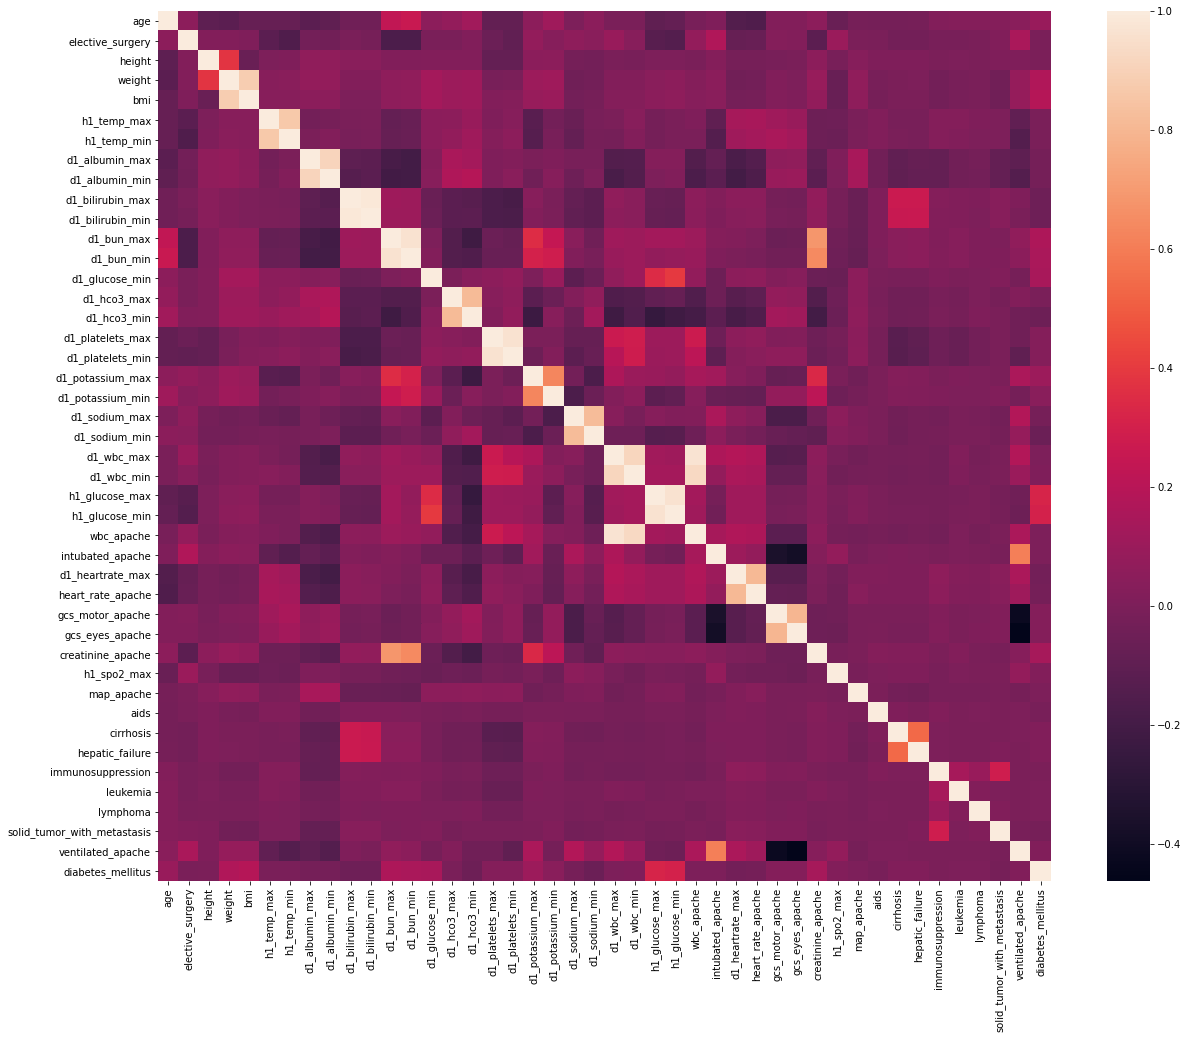

In [23]:
plt.figure(figsize=[20,16])
sns.heatmap(table.corr());

In [24]:
# remove columns have high correlation with another column
# keep one column for columns with corr > 0.99
corr_table = table.corr()

for x,y in np.argwhere(corr_table.to_numpy() > 0.90):
    if x <= y:
#         print(f"x : {x}")
#         print(f"y : {y}")
        continue
    colname = corr_table.columns[x]
    print(colname)
    if '_min' in colname:
#         print(colname)
        del table[colname]

d1_albumin_min
d1_bilirubin_min
d1_bun_min
d1_platelets_min
d1_wbc_min
h1_glucose_min
wbc_apache
wbc_apache


In [25]:
# len(table.columns)
table['diabetes_mellitus'].isna().sum()

0

## Checking distribution of each feature and fitting a gamma distribution for each feature

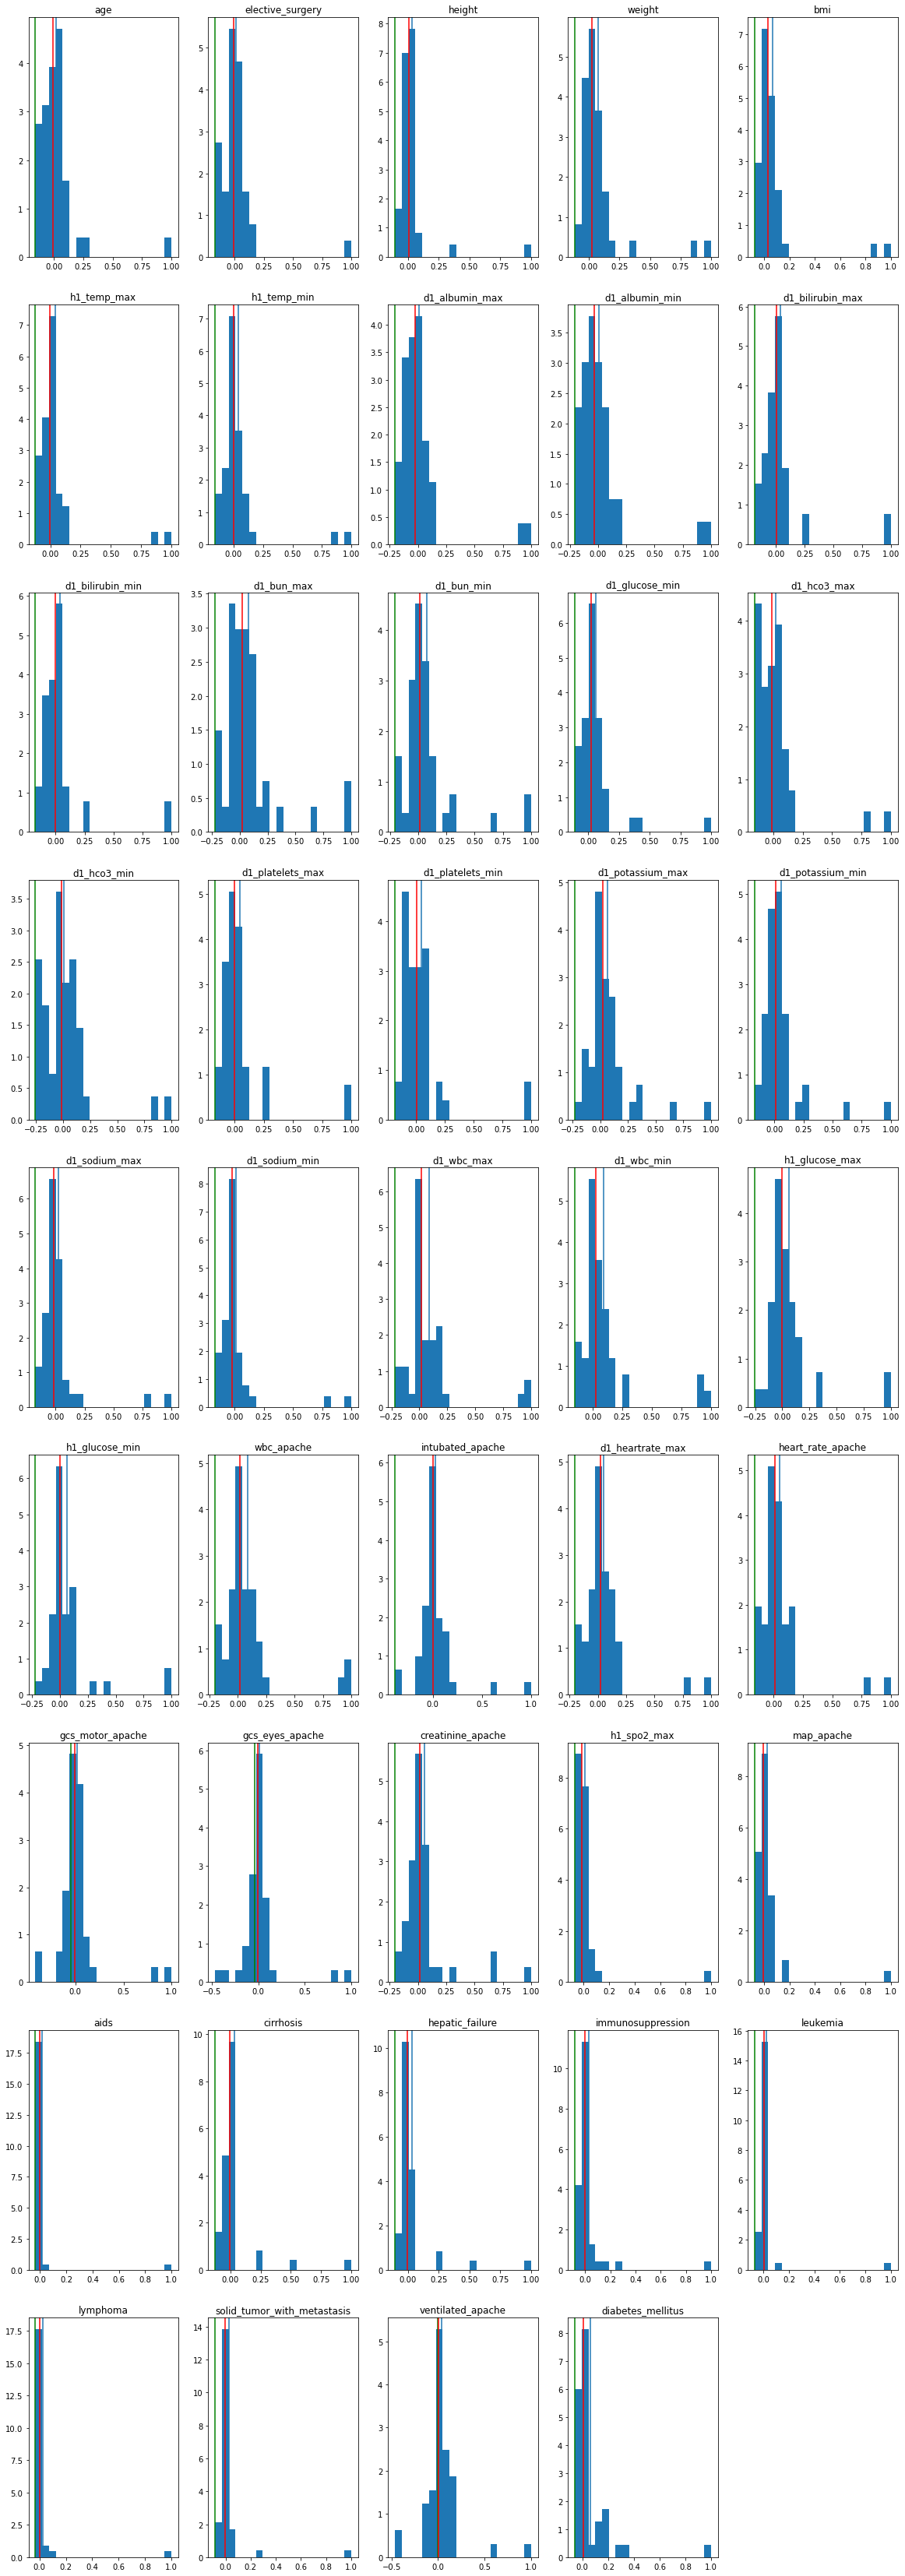

In [26]:
from scipy.stats import gamma
def fitplot_gamma(data):
  model = gamma.fit(data.dropna())
  x = np.linspace(data.min(), data.max(), 100)
  y = gamma.pdf(x, *model)
  if (y.max() < 2):
    plt.plot(x, y)
  plt.axvline(x[y.argmax()], color='g')

n = len(corr_table.columns)
sub_nrows = np.ceil(n / 5)
sub_ncols = 5
# colmodes = 
plt.figure(figsize=[20,60])
for i, colname in enumerate(corr_table.columns):
  plt.subplot(sub_nrows, sub_ncols, i+1)
  plt.hist(corr_table[colname], 20, density=True)
  fitplot_gamma(corr_table[colname])
  plt.axvline(corr_table[colname].mean())
  plt.axvline(corr_table[colname].median(), color='r')
  plt.title(colname)
  # break

## Fill missing values with median for each feature (according to the feature investigation, the median is more suitable than the mean)

In [27]:
# def fillna_in_table(table, param = {}):
#   table = copy.copy(table)
#   if 'remove_cols' in param:
#     for colname in param['remove_cols']:
#       del table[colname]
  
#   # col_mean = table.mean(0)
#   for colname in table.columns:
#     # if colname in ['gender', 'icu_type']:
#     if table[colname].dtype == object:
#       continue
#     print(colname, table[colname].median())
#     # print(table[colname])
#     table[colname].fillna(table[colname].median(), inplace=True)
#     # table = table.fillna(table[colname].median())
  
#   return table
  
# newtable = fillna_in_table(table)

In [28]:
new_table = copy.copy(table)
for i in new_table.columns:
    if new_table[i].dtype!='object':
        new_table[i].fillna(new_table[i].median(),inplace=True)
    else:
        new_table[i].fillna(new_table[i].mode()[0],inplace=True)

In [29]:
new_table.isna().sum()

gender                         0
ethnicity                      0
age                            0
elective_surgery               0
height                         0
weight                         0
bmi                            0
icu_type                       0
h1_temp_max                    0
h1_temp_min                    0
d1_albumin_max                 0
d1_bilirubin_max               0
d1_bun_max                     0
d1_glucose_min                 0
d1_hco3_max                    0
d1_hco3_min                    0
d1_platelets_max               0
d1_potassium_max               0
d1_potassium_min               0
d1_sodium_max                  0
d1_sodium_min                  0
d1_wbc_max                     0
h1_glucose_max                 0
wbc_apache                     0
intubated_apache               0
d1_heartrate_max               0
heart_rate_apache              0
gcs_motor_apache               0
gcs_eyes_apache                0
creatinine_apache              0
h1_spo2_ma

### Checking the duplicated values

In [30]:
new_table.shape

(79159, 41)

In [31]:
new_table[new_table.duplicated()]

,gender,ethnicity,age,elective_surgery,height,weight,bmi,icu_type,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
50141,M,Caucasian,0.0,0,170.0,81.6,28.029903,Med-Surg ICU,36.7,36.7,...,66.0,0,0,0,0,0,0,0,0,0
52706,M,Caucasian,0.0,0,170.0,81.6,28.029903,Med-Surg ICU,36.7,36.7,...,66.0,0,0,0,0,0,0,0,0,0
56976,M,Caucasian,0.0,0,170.0,81.6,28.029903,Med-Surg ICU,36.7,36.7,...,66.0,0,0,0,0,0,0,0,0,0
63655,F,Caucasian,59.0,0,165.1,156.6,57.451002,Med-Surg ICU,36.8,35.0,...,138.0,0,0,0,0,0,0,0,1,1
67151,M,Caucasian,19.0,0,188.0,81.6,28.029903,Med-Surg ICU,36.7,36.7,...,103.0,0,0,0,0,0,0,0,0,0
68629,F,Caucasian,25.0,0,172.7,95.3,31.952749,Med-Surg ICU,36.7,36.7,...,68.0,0,0,0,0,0,0,0,0,0
70052,M,Caucasian,0.0,0,170.0,81.6,28.029903,Med-Surg ICU,36.7,36.7,...,66.0,0,0,0,0,0,0,0,0,0
74860,M,Caucasian,0.0,0,170.0,81.6,28.029903,Med-Surg ICU,36.7,36.7,...,66.0,0,0,0,0,0,0,0,0,0


In [32]:
new_table.drop_duplicates(ignore_index=True,inplace=True)

In [33]:
new_table.shape

(79151, 41)

## Normalizing features and one-hot encoding categorical features

In [34]:
from sklearn import preprocessing
# enc.fit(table)
def encode_column(table, colname):
  table = copy.copy(table)
  enc = preprocessing.OneHotEncoder(drop='if_binary', sparse=False)
  newcol = enc.fit_transform(table[colname].to_numpy().reshape([-1,1]))
  new_colnames = ["%s_%d"%(colname, i) for i in range(newcol.shape[1])]
  table.loc[:,new_colnames] = newcol
  del table[colname]
  return table

def normalize_column(table, colname):
  table = copy.copy(table)
  scaler = preprocessing.StandardScaler()
  newcol = scaler.fit_transform(table[colname].to_numpy().reshape([-1,1]))
  table[colname] = newcol
  return table

cat_cols = []
for colname in new_table.columns:
  # if colname in ['gender', 'icu_type']:
  if new_table[colname].dtype == object:
    new_table = encode_column(new_table, colname)
  elif colname!='diabetes_mellitus':
    new_table = normalize_column(new_table, colname)
  
# enc.fit_transform(table[cat_cols], )
# cat_cols
new_table.head()

,age,elective_surgery,height,weight,bmi,h1_temp_max,h1_temp_min,d1_albumin_max,d1_bilirubin_max,d1_bun_max,...,ethnicity_4,ethnicity_5,icu_type_0,icu_type_1,icu_type_2,icu_type_3,icu_type_4,icu_type_5,icu_type_6,icu_type_7
0,0.337583,-0.483414,0.997598,-0.442464,-0.816371,4.101002,1.237613,-1.496435,-0.316306,0.250111,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-2.325368,-0.483414,0.290902,0.408908,0.288200,-0.024289,0.096034,0.053400,-0.144957,-0.297632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.142662,2.068622,-0.415794,-0.927826,-0.828022,-1.644938,-2.615216,0.053400,-0.144957,-0.297632,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-2.696943,-0.483414,1.713592,-0.136130,-0.181766,-0.024289,0.096034,0.053400,-0.144957,-0.297632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.894945,-0.483414,-0.890024,-0.589664,-0.254609,-0.613616,-0.474755,-3.046271,-0.247766,-0.745785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
new_table.dtypes.value_counts()

float64    52
int64       1
dtype: int64

In [36]:
new_table.shape

(79151, 53)

### Outliers Handling

In [37]:
from scipy import stats
df=new_table[(np.abs(stats.zscore(new_table)) < 3).all(axis=1)]
df.reset_index(drop=True,inplace=True)
df

,age,elective_surgery,height,weight,bmi,h1_temp_max,h1_temp_min,d1_albumin_max,d1_bilirubin_max,d1_bun_max,...,ethnicity_4,ethnicity_5,icu_type_0,icu_type_1,icu_type_2,icu_type_3,icu_type_4,icu_type_5,icu_type_6,icu_type_7
0,-2.325368,-0.483414,0.290902,0.408908,0.288200,-0.024289,0.096034,0.053400,-0.144957,-0.297632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-2.696943,-0.483414,1.713592,-0.136130,-0.181766,-0.024289,0.096034,0.053400,-0.144957,-0.297632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.275654,-0.483414,1.946058,0.595891,-0.238587,-0.024289,0.096034,0.053400,-0.144957,-0.646195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.771087,2.068622,1.239362,1.073296,0.471216,-0.613616,-0.617453,0.053400,-0.144957,-0.447016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.337583,-0.483414,0.290902,0.711264,0.593477,-0.466284,-0.332058,0.053400,-0.144957,-0.745785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25737,0.523371,-0.483414,-0.425092,0.890291,1.186273,1.449030,1.523008,-0.610815,-0.247766,-0.347426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25738,-2.325368,2.068622,0.765132,0.679437,0.329443,-0.466284,-0.332058,0.053400,-0.144957,-0.546606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25739,0.894945,-0.483414,0.225812,0.313427,0.222232,0.859702,0.952218,-0.168005,-0.110687,0.200317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25740,1.452307,-0.483414,-0.183328,0.046876,0.136601,-0.024289,0.096034,0.053400,-0.144957,-0.447016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
df.shape

(25742, 53)

## Note :
#### 1. After removing 60% missing values columns, there were 48 columns left
#### 2. Columns with zero sum will be removed as they don't help in prediction. Hence removed 'readmission_status' column.
#### 3. Checking the correleation among all features and deleted features with more than 90% correlation.
#### 4. Removing the highly correlated features will help in reducing the shape of the data which helps further in processing time.
#### 5. For handling the missing values since the data is skewed , we have choosen "Median" for Numerical datatype features and "Mode" for Categorical datatype features.
#### 6. For checking the Duplicated values, we found 8 rows which were deleted to remove duplicacy of training records.
#### 7. We did Normalization using StandardScaler to transform features to be on a similar scale. This improves the performance and training stability of the model.
#### 8. We did One hot Encoding categorical data, a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models.
#### 9. We use this categorical data encoding technique as the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we created a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.
#### 10.  We performed outlier detection by using 3 standard deviations and everything lying away from this will be treated as an outlier and removed the data having z-score greater than 3.
#### 11. The original data had 79159 rows and now the new data frame has 25739 and those 53420 rows that were treated as outliers are now removed.

## Model Training

## Splitting dataset into training and test dataset

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'diabetes_mellitus'], df['diabetes_mellitus'].astype(int), test_size=0.33, random_state=42)

### fitting an SVM model

In [40]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
# pred = svm_model.predict(X_train)
# acc = (pred == y_train).mean()
# acc

SVC()

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred = svm_model.predict(X_test)
print(f"Classification Report for SVM model : \n {classification_report(y_test,pred)}")
acc = (pred == y_test).mean()
print(f"Accuracy of the SVM Model :{acc}")

Classification Report for SVM model : 
               precision    recall  f1-score   support

           0       0.75      0.94      0.83      5827
           1       0.70      0.33      0.45      2668

    accuracy                           0.74      8495
   macro avg       0.73      0.63      0.64      8495
weighted avg       0.74      0.74      0.71      8495

Accuracy of the SVM Model :0.7446733372572101


## SVM model and cross-validation scores



In [42]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC
from sklearn.metrics import recall_score
clf = SVC(random_state=0)
# cross_val_score(clf, table, 'diabetes_mellitus', cv=10)
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(clf, X_train, y_train, scoring=scoring, return_estimator=True, cv=10)
scores

{'fit_time': array([22.6187675 , 21.83886909, 23.1129849 , 22.31773853, 23.28122878,
        23.05492139, 23.32160497, 23.39152145, 23.02005506, 23.39817905]),
 'score_time': array([0.94810963, 0.97507429, 0.96914935, 1.05619478, 0.98453164,
        1.0289557 , 1.03779221, 0.96317697, 1.00898695, 0.96708059]),
 'estimator': (SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0)),
 'test_precision_macro': array([0.72803229, 0.72615046, 0.72078613, 0.72508879, 0.71615736,
        0.70102419, 0.73273413, 0.70474258, 0.7185345 , 0.74251392]),
 'test_recall_macro': array([0.63492763, 0.63168871, 0.62478679, 0.62936555, 0.61769165,
        0.62537708, 0.63653398, 0.62090249, 0.61900693, 0.64138012]),
 'test_accuracy': array([0.74492754, 0.74318841, 0.73913043, 0.74202899, 0.73565217,
        0.73333333, 0.74724638, 0.7331

In [43]:
allscores = {}
allscores['svm'] = scores

### fitting an Decision Tree model

In [44]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0,max_depth=2)
decision_tree = decision_tree.fit(X_train, y_train)

In [45]:
pred = decision_tree.predict(X_test)
print(f"Classification Report for Decision Tree model : \n {classification_report(y_test,pred)}")
acc = (pred == y_test).mean()
print(f"Accuracy of the Decision Tree Model :{acc}")

Classification Report for Decision Tree model : 
               precision    recall  f1-score   support

           0       0.74      0.93      0.82      5827
           1       0.65      0.27      0.38      2668

    accuracy                           0.73      8495
   macro avg       0.69      0.60      0.60      8495
weighted avg       0.71      0.73      0.68      8495

Accuracy of the Decision Tree Model :0.7254855797527958


## Decision tree and cross-validation scores

In [46]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
clf = DecisionTreeClassifier(random_state=0)
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(clf, X_train, y_train, scoring=scoring, return_estimator=True, cv=10)
allscores['decision_tree'] = scores
scores

{'fit_time': array([0.37271619, 0.36802959, 0.42011333, 0.39194846, 0.38149261,
        0.37170839, 0.38310695, 0.37791419, 0.3910327 , 0.38083076]),
 'score_time': array([0.00500011, 0.00800085, 0.00700068, 0.0079999 , 0.00500059,
        0.00500154, 0.00600147, 0.00500083, 0.006001  , 0.00499988]),
 'estimator': (DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0)),
 'test_precision_macro': array([0.60317228, 0.60693734, 0.57482097, 0.63569099, 0.57595789,
        0.60126732, 0.59807441, 0.58607588, 0.59883835, 0.60902928]),
 'test_recall_macro': array([0.60347519, 0.60756229, 0.57547372, 0.63661466, 0.57830431,
        0.603

### Fitting Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=8, random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=0)

In [48]:
pred = RF.predict(X_test)
print(f"Classification Report for RF model : \n {classification_report(y_test,pred)}")
acc = (pred == y_test).mean()
print(f"Accuracy of the RF Model :{acc}")

Classification Report for RF model : 
               precision    recall  f1-score   support

           0       0.74      0.94      0.83      5827
           1       0.70      0.29      0.41      2668

    accuracy                           0.74      8495
   macro avg       0.72      0.62      0.62      8495
weighted avg       0.73      0.74      0.70      8495

Accuracy of the RF Model :0.7383166568569747


## Random forest and cross-validation scores

In [49]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
clf = RandomForestClassifier(n_estimators=10,random_state=0)
# cross_val_score(clf, table, 'diabetes_mellitus', cv=10)
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(clf, X_train, y_train, scoring=scoring, return_estimator=True, cv=10)
allscores['random_forest'] = scores
scores

{'fit_time': array([0.43403625, 0.43577337, 0.42203569, 0.45396042, 0.4687202 ,
        0.45575523, 0.51682758, 0.44003105, 0.48804092, 0.459162  ]),
 'score_time': array([0.01000071, 0.01200104, 0.01000047, 0.01200104, 0.0120008 ,
        0.01399803, 0.01000071, 0.01200008, 0.0130012 , 0.0098021 ]),
 'estimator': (RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0)),
 'test_precision_macro': array([0.69235911, 0.67302359, 0.6633907 , 0.6877193 , 0.67361175,
  

## Plot performances of models

In [50]:
def plot_results(allscores):
  res = {}
  for m, scores in allscores.items():
    for metric in ['test_accuracy', 'test_precision_macro', 'test_recall_macro']:
      res[(m, metric)] = scores[metric]
  df = pd.DataFrame(res)
  value = df.mean(0)
  std = df.std(0)
  return df
df_results = plot_results(allscores)
df_results = df_results.swaplevel(0, 1, axis=1)
df_results.sort_index(1, 0, inplace=True)
df_results

<ipython-input-50-de4ec68a4cc2>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  df_results.sort_index(1, 0, inplace=True)


test_accuracy                         test_precision_macro                \
  decision_tree random_forest       svm        decision_tree random_forest   
0      0.656232      0.730435  0.744928             0.603172      0.692359   
1      0.659130      0.718841  0.743188             0.606937      0.673024   
2      0.630725      0.713623  0.739130             0.574821      0.663391   
3      0.684058      0.727536  0.742029             0.635691      0.687719   
4      0.628406      0.720000  0.735652             0.575958      0.673612   
5      0.652174      0.719420  0.733333             0.601267      0.670994   
6      0.648116      0.739710  0.747246             0.598074      0.706571   
7      0.639211      0.720998  0.733179             0.586076      0.675348   
8      0.651392      0.727958  0.736659             0.598838      0.687041   
9      0.658933      0.727958  0.751740             0.609029      0.689869   

            test_recall_macro                          
        svm     decision_tree random_forest       svm  
0  0.728032          0.603475      0.628750  0.634928  
1  0.726150          0.607562      0.613385  0.631689  
2  0.720786          0.575474      0.609077  0.624787  
3  0.725089          0.636615      0.624663  0.629366  
4  0.716157          0.578304      0.616619  0.617692  
5  0.701024          0.603576      0.622119  0.625377  
6  0.732734          0.601104      0.640900  0.636534  
7  0.704743          0.587721      0.618410  0.620902  
8  0.718535          0.600080      0.626953  0.619007  
9  0.742514          0.611513      0.621526  0.641380

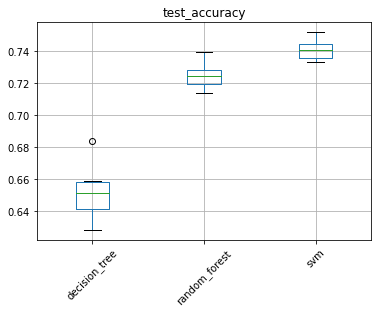

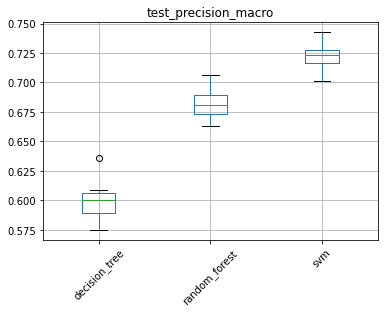

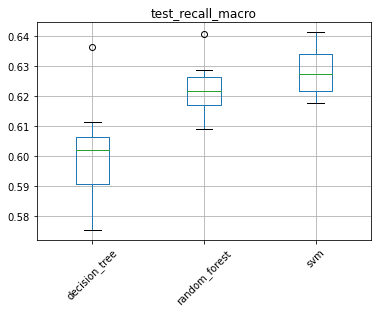

In [51]:
#  sns.barplot(data=df)
for metric in ['test_accuracy', 'test_precision_macro', 'test_recall_macro']:
  plt.figure()
  df_results[metric].boxplot()
  plt.title(metric)
  plt.xticks(rotation=45)

### According to the figures, SVM is significantly better than decision tree and random forest models

### Checking the Class imbalance

0    17620
1     8122
Name: diabetes_mellitus, dtype: int64

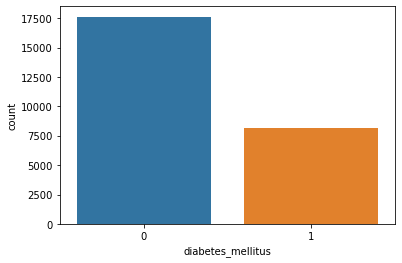

In [52]:
import seaborn as sb
sb.countplot(df.diabetes_mellitus)
df.diabetes_mellitus.value_counts()

### Resampling (Over/Up-Sample) Minority Class

In [53]:
df.diabetes_mellitus.value_counts()

0    17620
1     8122
Name: diabetes_mellitus, dtype: int64

In [54]:
from sklearn.utils import resample
# Dividing majority and minority classes
df_major = df[df.diabetes_mellitus == 0]
df_minor = df[df.diabetes_mellitus == 1]
  
# Upsampling minority class
df_minor_sample = resample(df_minor,
                           # Upsample with replacement
                           replace=True,    
                           # Number to match majority class
                           n_samples=17620,   
                           random_state=42)

In [55]:
# Combine majority and upsampled minority class
df_sample = pd.concat([df_major, df_minor_sample])
  
# Display count of data points in both class
print(df_sample.diabetes_mellitus.value_counts())
df_sample.reset_index(drop=True,inplace=True)

0    17620
1    17620
Name: diabetes_mellitus, dtype: int64


0    17620
1    17620
Name: diabetes_mellitus, dtype: int64

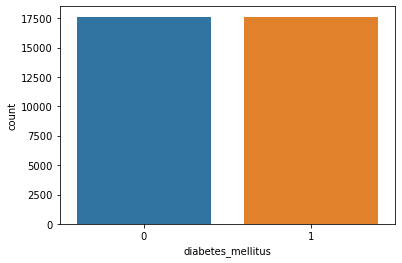

In [56]:
sb.countplot(df_sample.diabetes_mellitus)
df_sample.diabetes_mellitus.value_counts()

In [58]:
df.shape

(25742, 53)

In [59]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_sample.loc[:, df_sample.columns != 'diabetes_mellitus'], df_sample['diabetes_mellitus'].astype(int), test_size=0.33, random_state=42)

In [60]:
from sklearn import svm
svm_model1 = svm.SVC()
svm_model1.fit(X_train1, y_train1)

SVC()

In [61]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred = svm_model1.predict(X_test1)
print(f"Classification Report for SVM model : \n {classification_report(y_test1,pred)}")
acc = (pred == y_test1).mean()
print(f"Accuracy of the SVM Model :{acc}")

Classification Report for SVM model : 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      5869
           1       0.74      0.72      0.73      5761

    accuracy                           0.74     11630
   macro avg       0.74      0.74      0.74     11630
weighted avg       0.74      0.74      0.74     11630

Accuracy of the SVM Model :0.7354256233877902


#### After resolving Class imbalance, we can see the precision and recall are well improved and our model will perform good for both classes

## Unsupervised learning

### fitting KMeans clustering

In [114]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


reduced_data = PCA(n_components=3).fit_transform(X_train1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(reduced_data)


(-10.0, 20.0)

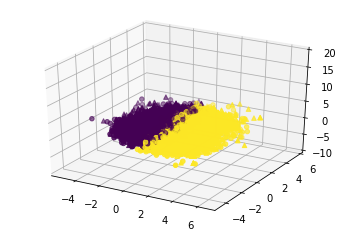

In [115]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

markers = ['o', '^']
for c in [0, 1]:
  ind = y_train1 == c
  # plt.scatter(reduced_data[ind,0], reduced_data[ind,1], marker=markers[c], c=kmeans.predict(reduced_data[ind,:]))
  ax.scatter(reduced_data[ind,0], reduced_data[ind,1], reduced_data[ind,2], marker=markers[c], c=kmeans.predict(reduced_data[ind,:]),)
ax.set_zlim(-10, 20)

No clear clustering with kmeans

T-SNE plotting

In [116]:
# from sklearn.manifold import TSNE

# X_embedded = TSNE(n_components=2,init='random')

In [117]:
# X_embedded=X_embedded.fit_transform(X_train1)

TypeError: 'TSNE' object is not subscriptable

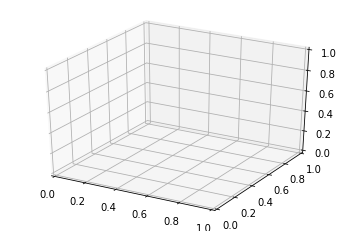

In [118]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

markers = ['o', '^']
for c in [0, 1]:
  ind = (y_train1 == c)
  ax.scatter(X_embedded[ind,0], X_embedded[ind,1], marker='.')
ax.set_zlim(-10, 10)

There are some clusters, but no correlation with the target label

## Feature Selection

Fitting a linear model with L1 regularization to select features

In [119]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=100000, tol=1e-8, penalty='l1')
clf=clf.fit(X_train1, y_train1)
pred = clf.predict(X_test1)
acc = (pred == y_test1).mean()
acc

0.6701633705932932

Select features with coefficients greater than 0.1

In [120]:
ind = (np.abs(clf.coef_) > 0.1)[0]
# print(len(ind))
print(len(X_train1.columns[ind]))
print(X_train1.columns[ind])

19
Index(['age', 'bmi', 'd1_albumin_max', 'd1_bilirubin_max', 'd1_bun_max',
       'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max',
       'd1_potassium_min', 'd1_sodium_min', 'd1_wbc_max', 'h1_glucose_max',
       'gcs_motor_apache', 'creatinine_apache', 'h1_spo2_max', 'gender_0',
       'ethnicity_0', 'ethnicity_2'],
      dtype='object')


In [121]:
clf.coef_[0][ind]

array([ 0.17592132,  0.50411623, -0.12210008, -0.49274655,  0.29469525,
        0.14668946,  0.31861951, -0.26607178,  0.1451849 , -0.23140882,
       -0.10290045, -0.18443361,  0.89104358,  0.23418116,  0.42120393,
        0.23502639,  0.16096163,  0.30463127, -0.10171774])

In [122]:
clf = SGDClassifier(max_iter=100000, tol=1e-8, penalty='l1')
clf.fit(X_train1.iloc[:,ind], y_train1)
pred = clf.predict(X_test1.iloc[:,ind])
acc = (pred == y_test1).mean()
acc

0.6583834909716251

In [123]:
selected_features = X_train1.columns[ind]
selected_features

Index(['age', 'bmi', 'd1_albumin_max', 'd1_bilirubin_max', 'd1_bun_max',
       'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max',
       'd1_potassium_min', 'd1_sodium_min', 'd1_wbc_max', 'h1_glucose_max',
       'gcs_motor_apache', 'creatinine_apache', 'h1_spo2_max', 'gender_0',
       'ethnicity_0', 'ethnicity_2'],
      dtype='object')

Train models again with selected features

In [124]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC
from sklearn.metrics import recall_score
clf = SVC(random_state=0)
# cross_val_score(clf, table, 'diabetes_mellitus', cv=10)
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(clf, X_train1.loc[:,selected_features], y_train1, scoring=scoring, return_estimator=True, cv=10)
allscores['random_forest'] = scores
scores

{'fit_time': array([20.94501424, 21.96067286, 21.98055196, 22.16819668, 23.98949122,
        27.73480201, 23.11621594, 29.92396712, 32.45643878, 26.09861207]),
 'score_time': array([1.12212014, 1.11042881, 1.25724149, 1.18880773, 1.16131711,
        1.16158915, 1.22296023, 1.17108512, 1.23309207, 1.20011282]),
 'estimator': (SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0),
  SVC(random_state=0)),
 'test_precision_macro': array([0.718046  , 0.7382379 , 0.71807832, 0.71853437, 0.70283951,
        0.71688625, 0.72241051, 0.73147983, 0.7346393 , 0.71510247]),
 'test_recall_macro': array([0.71760288, 0.73753184, 0.71797316, 0.71840264, 0.70236267,
        0.7167163 , 0.72185031, 0.73114097, 0.73449787, 0.7149972 ]),
 'test_accuracy': array([0.71749259, 0.73739941, 0.71791614, 0.71833969, 0.70224481,
        0.71664549, 0.72172808, 0.7310

In [125]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
clf = DecisionTreeClassifier(random_state=0)
# cross_val_score(clf, table, 'diabetes_mellitus', cv=10)
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(clf, X_train1.loc[:,selected_features], y_train1, scoring=scoring, return_estimator=True, cv=10)
allscores['decision_tree'] = scores
scores

{'fit_time': array([0.35371256, 0.31499147, 0.3298111 , 0.30575895, 0.2940197 ,
        0.30902362, 0.2970202 , 0.29702091, 0.30202055, 0.28898644]),
 'score_time': array([0.00900578, 0.00699949, 0.00600171, 0.00700259, 0.00699878,
        0.00600338, 0.0059998 , 0.00700021, 0.00600481, 0.00599813]),
 'estimator': (DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0),
  DecisionTreeClassifier(random_state=0)),
 'test_precision_macro': array([0.81002741, 0.80616372, 0.78587018, 0.78804632, 0.79017404,
        0.80090692, 0.79632092, 0.79986145, 0.80449025, 0.81378284]),
 'test_recall_macro': array([0.80356679, 0.80106096, 0.78159305, 0.78109253, 0.78104123,
        0.789

In [126]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
clf = RandomForestClassifier(n_estimators=10,random_state=0)
# cross_val_score(clf, table, 'diabetes_mellitus', cv=10)
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(clf, X_train1.loc[:,selected_features], y_train1, scoring=scoring, return_estimator=True, cv=10)
allscores['random_forest'] = scores
scores

{'fit_time': array([0.52445126, 0.51406121, 0.55204225, 0.5460372 , 0.56103659,
        0.57103872, 0.55504036, 0.52503943, 0.51907492, 0.57144904]),
 'score_time': array([0.0160048 , 0.01897764, 0.01600218, 0.0160079 , 0.01700592,
        0.01900125, 0.01300144, 0.01300168, 0.01696539, 0.01500082]),
 'estimator': (RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0),
  RandomForestClassifier(n_estimators=10, random_state=0)),
 'test_precision_macro': array([0.83594886, 0.84243867, 0.8284805 , 0.84359348, 0.83906202,
  

In [127]:
def plot_results(allscores):
  res = {}
  for m, scores in allscores.items():
    for metric in ['test_accuracy', 'test_precision_macro', 'test_recall_macro']:
      res[(m, metric)] = scores[metric]
  df = pd.DataFrame(res)
  value = df.mean(0)
  std = df.std(0)
  return df
df = plot_results(allscores)
df = df.swaplevel(0, 1, axis=1)
df.sort_index(1, 0, inplace=True)
df

<ipython-input-127-992511e4ee9b>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  df.sort_index(1, 0, inplace=True)


test_accuracy                         test_precision_macro                \
  decision_tree random_forest       svm        decision_tree random_forest   
0      0.803897      0.835239  0.744928             0.810027      0.835949   
1      0.801355      0.842440  0.743188             0.806164      0.842439   
2      0.781872      0.828463  0.739130             0.785870      0.828480   
3      0.781449      0.843287  0.742029             0.788046      0.843593   
4      0.781449      0.838628  0.735652             0.790174      0.839062   
5      0.789496      0.847099  0.733333             0.800907      0.847546   
6      0.791614      0.853452  0.747246             0.796321      0.853456   
7      0.794155      0.829310  0.733179             0.799861      0.829322   
8      0.796273      0.844557  0.736659             0.804490      0.845290   
9      0.807285      0.833969  0.751740             0.813783      0.834864   

            test_recall_macro                          
        svm     decision_tree random_forest       svm  
0  0.728032          0.803567      0.835131  0.634928  
1  0.726150          0.801061      0.842432  0.631689  
2  0.720786          0.781593      0.828480  0.624787  
3  0.725089          0.781093      0.843216  0.629366  
4  0.716157          0.781041      0.838543  0.617692  
5  0.701024          0.789040      0.847014  0.625377  
6  0.732734          0.791317      0.853441  0.636534  
7  0.704743          0.793831      0.829292  0.620902  
8  0.718535          0.795887      0.844449  0.619007  
9  0.742514          0.807009      0.833869  0.641380

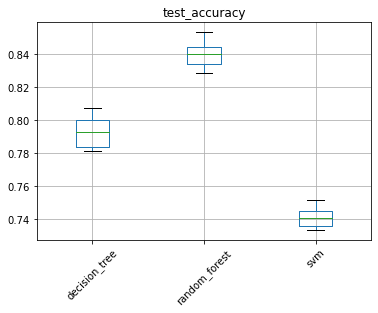

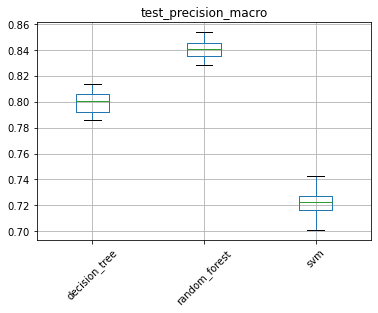

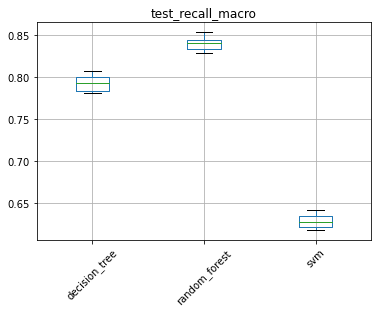

In [128]:
#  sns.barplot(data=df)
for metric in ['test_accuracy', 'test_precision_macro', 'test_recall_macro']:
  plt.figure()
  df[metric].boxplot()
  plt.title(metric)
  plt.xticks(rotation=45)

There is no significant improvement with feature selection but the variance of models have reduced.

Unsupervised learning with selected features

In [129]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


reduced_data = PCA(n_components=10).fit_transform(X_train1.loc[:, selected_features])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train1.loc[:, selected_features])

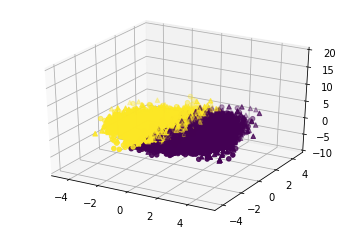

In [131]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

markers = ['o', '^']
for c in [0, 1]:
  ind = y_train1 == c
  # plt.scatter(reduced_data[ind,0], reduced_data[ind,1], marker=markers[c], c=kmeans.predict(reduced_data[ind,:]))
  ax.scatter(reduced_data[ind,0], reduced_data[ind,1], reduced_data[ind,2], marker=markers[c], c=kmeans.predict(X_train1.loc[ind, selected_features]))
ax.set_zlim(-10, 20)
plt.show()

In [132]:
print(y_train1[kmeans.predict(X_train1.loc[:, selected_features]) == 0].mean())
print(y_train1[kmeans.predict(X_train1.loc[:, selected_features]) == 1].mean())

0.4708969912831568
0.5281662931767251


In [133]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2,init='random').fit_transform(X_train1.loc[:,selected_features])
X_embedded

array([[-55.191906 , -17.04429  ],
       [-16.315931 ,  41.25413  ],
       [ -5.516669 , -23.123938 ],
       ...,
       [  2.3214657, -62.587776 ],
       [ 11.897721 ,  33.229805 ],
       [-38.478283 ,  42.05145  ]], dtype=float32)

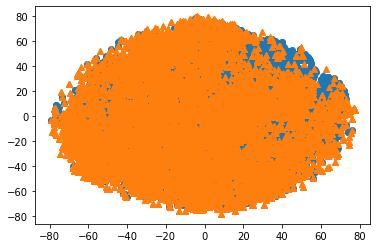

In [134]:

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

markers = ['o', '^']
for c in [0, 1]:
  ind = y_train1 == c
  # plt.scatter(reduced_data[ind,0], reduced_data[ind,1], marker=markers[c], c=kmeans.predict(reduced_data[ind,:]))
  # ax.scatter(reduced_data[ind,0], reduced_data[ind,1], reduced_data[ind,2], marker=markers[c], c=TSNE.predict(X_train[ind,:]))
  plt.scatter(X_embedded[ind,0], X_embedded[ind,1], marker=markers[c])
# ax.set_zlim(-10, 20)

There is still no relation between the clusters and the target label.

(-10.0, 20.0)

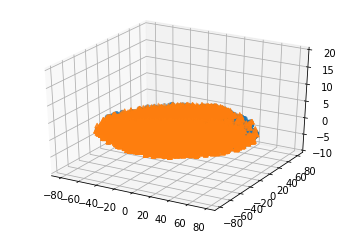

In [135]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

markers = ['o', '^']
for c in [0, 1]:
  ind = y_train1 == c
  # plt.scatter(reduced_data[ind,0], reduced_data[ind,1], marker=markers[c], c=kmeans.predict(reduced_data[ind,:]))
#   ax.scatter(reduced_data[ind,0], reduced_data[ind,1], reduced_data[ind,2], marker=markers[c], c=TSNE.predict(X_train[ind,:]))
  ax.scatter(X_embedded[ind,0], X_embedded[ind,1], marker=markers[c])
ax.set_zlim(-10, 20)

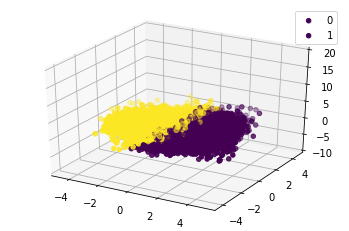

In [136]:
data2 = X_train1.loc[:, selected_features]
# KMEANS 2
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(data2)
labels2 = kmeans2.predict(data2)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# visualization
markers = ['o', '^']
for i in [0, 1]:
    ind = y_train1 == i
    ax.scatter(reduced_data[ind,0], reduced_data[ind,1], reduced_data[ind,2],c=kmeans.predict(X_train1.loc[ind, selected_features]))

  # plt.scatter(reduced_data[ind,0], reduced_data[ind,1], marker=markers[c], c=kmeans.predict(reduced_data[ind,:]))
#   ax.scatter(reduced_data[ind,0], reduced_data[ind,1],reduced_data[ind,2], c=labels2)
ax.set_zlim(-10, 20)
plt.legend([0,1])
plt.show()

In [159]:
y = y_train1.values # Predict class matrix
labels=kmeans2.labels_

In [160]:
from sklearn.metrics.cluster import contingency_matrix
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(y, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 53.94%


Elbow Model

In [145]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters
X=X_train1.loc[:,selected_features].values
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


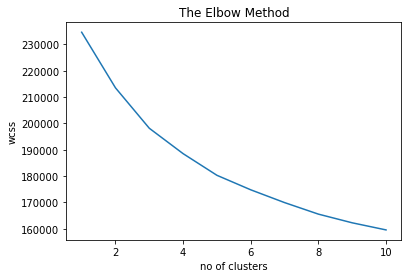

In [146]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [147]:
#If you zoom out this curve then you will see that last elbow comes at k=5
##so k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)


In [148]:
X

array([[ 1.32844913, -0.3344041 ,  0.05340004, ...,  1.        ,
         0.        ,  1.        ],
       [-0.71521157, -0.33663309,  0.05340004, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.51423647, -0.07221656,  0.9390202 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.151796  ,  0.98085257,  0.05340004, ...,  0.        ,
         0.        ,  1.        ],
       [-0.8390698 , -1.19524418,  0.9390202 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.46144156, -1.38782591, -0.38941004, ...,  0.        ,
         0.        ,  1.        ]])

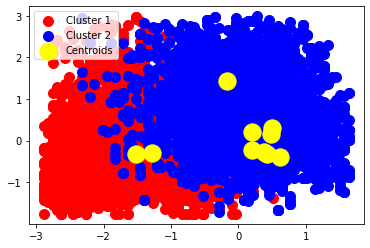

In [149]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

Purity Score:

Purity score is computed using Ground Truth or External accessment. Since, the dataset consists of a true class label, the accuracy of the cluster label computed using KMeans is compared against the true label class.

In [162]:
y = y_train1.values # Predict class matrix
labels=kmeansmodel.labels_

In [163]:
# from sklearn.metrics.cluster import contingency_matrix
# def purity_score(y_true, y_pred):
#     # compute contingency matrix (also called confusion matrix)
#     confusion_matrix = contingency_matrix(y_true, y_pred)
#     # return purity
#     return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(y, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 59.95%


In [167]:
from sklearn import metrics
metrics.silhouette_score(X, labels, metric='euclidean')

0.07309903956726684

In [169]:
metrics.adjusted_rand_score(y, labels)

0.01997890840567275

In [171]:
metrics.adjusted_mutual_info_score(y, labels)

0.02283481602063014

In [172]:
metrics.homogeneity_score(y, labels)

0.03724789206939153